In [30]:
# ! pip install pandas matplotlib seaborn numpy plotly

## Import Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## Load dataset

In [32]:
df = pd.read_csv('Cyber_salaries.csv')
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
563,2022,SE,CT,Application Security Engineer,200000,USD,200000,BR,100,CA,L
755,2022,MI,FT,Information Security Engineer,130000,USD,130000,US,100,US,L
1172,2020,MI,FT,Cyber Security Specialist,105000,AUD,72317,AU,0,AU,L
416,2022,SE,FT,Security Engineer,200100,USD,200100,US,100,US,M
392,2022,MI,FT,Security Analyst,60000,USD,60000,US,100,US,M


## Filtering to broaden the view of the data

In [33]:
df['company_size'].value_counts()

company_size
L    798
M    459
S     92
Name: count, dtype: int64

In [34]:
df['salary_currency'].value_counts()

salary_currency
USD    1026
EUR     133
GBP      60
CAD      39
INR      23
AUD      18
BRL      12
CHF       9
NZD       5
PLN       4
DKK       4
ZAR       3
SEK       3
ILS       2
SGD       2
NOK       1
IDR       1
MXN       1
HUF       1
TWD       1
RUB       1
Name: count, dtype: int64

In [35]:
df['employment_type'].value_counts()

employment_type
FT    1326
CT      11
PT       9
FL       3
Name: count, dtype: int64

In [36]:
df['experience_level'].value_counts()

experience_level
SE    622
MI    433
EN    218
EX     76
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1349 non-null   int64 
 1   experience_level    1349 non-null   object
 2   employment_type     1349 non-null   object
 3   job_title           1349 non-null   object
 4   salary              1349 non-null   int64 
 5   salary_currency     1349 non-null   object
 6   salary_in_usd       1349 non-null   int64 
 7   employee_residence  1349 non-null   object
 8   remote_ratio        1349 non-null   int64 
 9   company_location    1349 non-null   object
 10  company_size        1349 non-null   object
dtypes: int64(4), object(7)
memory usage: 116.1+ KB


## Check for outliers in numeric columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')


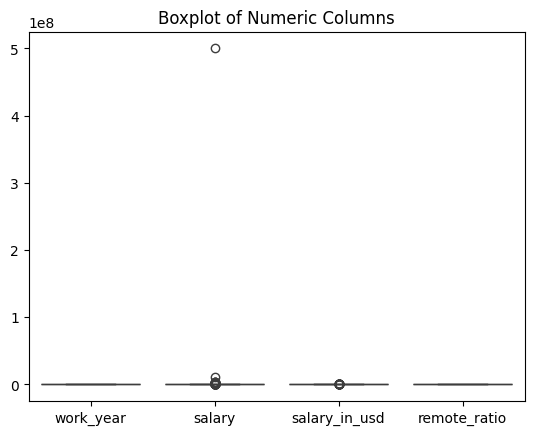

In [38]:
numeric_columns = df.select_dtypes(include=np.number).columns
print(numeric_columns)
sns.boxplot(data=df[numeric_columns])
plt.title("Boxplot of Numeric Columns")
plt.show()

A minute - very minimal or zero actually - presence of outliers in salary and salar_in_usd columns

## Check for missing values

In [39]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


## Visualizations

## Boxplot to show Salary distribution by Job Title and Experience Level

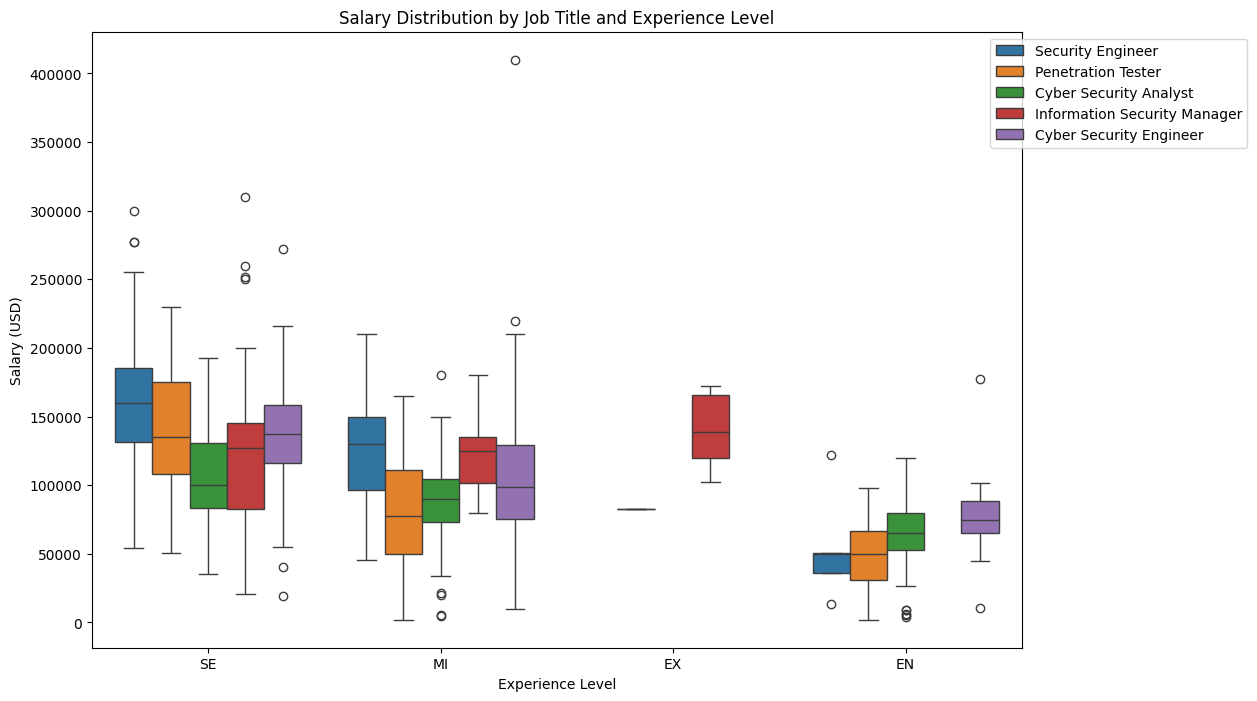

In [40]:
# show top 5 most common job titles)
top_job_titles = df['job_title'].value_counts().nlargest(5).index
filtered_data = df[df['job_title'].isin(top_job_titles)]

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x="experience_level", y="salary_in_usd", hue="job_title", data=filtered_data)
plt.title("Salary Distribution by Job Title and Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

## Salary trend over years

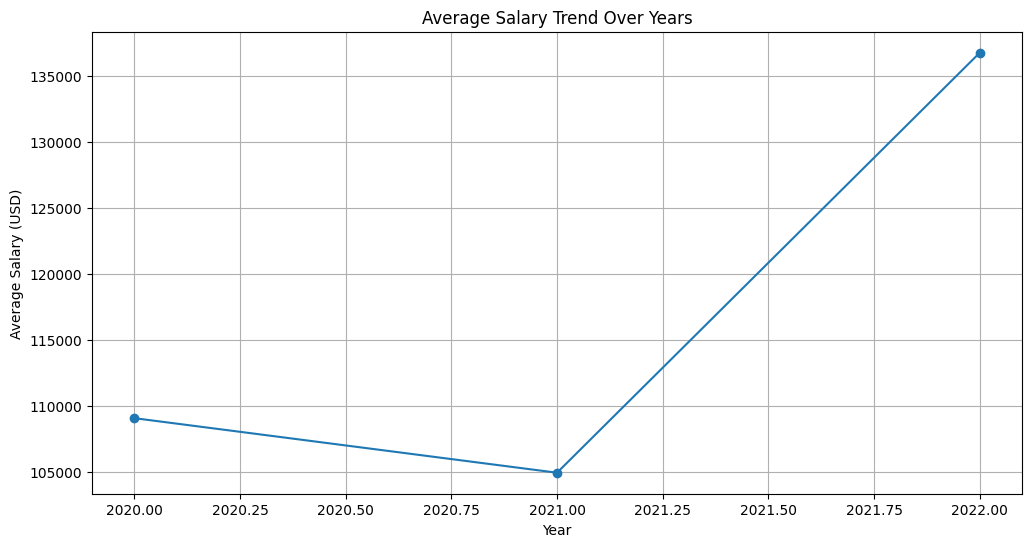

In [41]:
avg_salary_by_year = df.groupby("work_year")["salary_in_usd"].mean()
plt.figure(figsize=(12, 6))
avg_salary_by_year.plot(marker='o')
plt.title("Average Salary Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True)
plt.show()

## Scatterplot to show remote working ratio vs salary

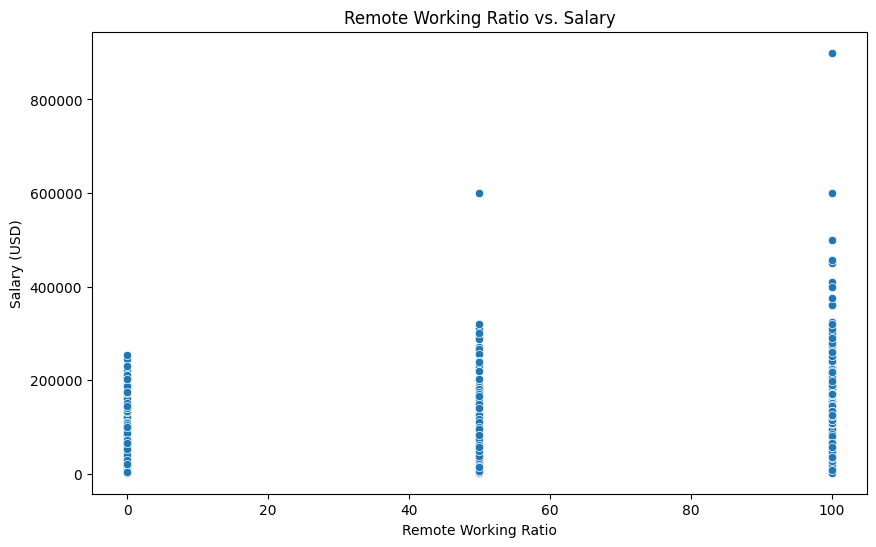

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="remote_ratio", y="salary_in_usd", data=df)
plt.title("Remote Working Ratio vs. Salary")
plt.xlabel("Remote Working Ratio")
plt.ylabel("Salary (USD)")
plt.show()

## company size vs salary

In [43]:
fig = px.box(df, x="company_size", y="salary_in_usd", points="all", title="Company Size vs. Salary")
fig.update_xaxes(title="Company Size")
fig.update_yaxes(title="Salary (USD)")
fig.show()

In [44]:
df.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1344,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1345,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1346,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1347,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L
1348,2021,MI,FT,Threat Intelligence Analyst,66310,USD,66310,US,0,US,L


## Bar plot to visualize Geographical distribution of salaries

In [46]:
# Calculate average salary by country
avg_salary_by_country = df.groupby("company_location")["salary_in_usd"].mean().reset_index()

# Create bar plot
fig = px.bar(avg_salary_by_country, x="company_location", y="salary_in_usd", title="Average Salary by Country", labels={"company_location": "Country", "salary_in_usd": "Average Salary (USD)"})

fig.update_layout(xaxis_title="Country", yaxis_title="Average Salary (USD)")

fig.show()